<a href="https://colab.research.google.com/github/ReinerJasin/ai-app-sys/blob/main/week6(sess2)_12224827.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the tensorflow

In [1]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110.5 MB 1.3 kB/s 
     |████████████████████████████████| 3.8 MB 52.7 MB/s 
     |████████████████████████████████| 2.9 MB 63.2 MB/s 
     |████████████████████████████████| 503 kB 66.7 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=7a15f2cdf3a061b1c42d4ed9c0644e98826c2b5e1c2ce62229db1b306885f6eb
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninst

Import dependencies

In [2]:
import os
import numpy as np
import zipfile
from urllib import request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
import cv2

Read csv file using np.loadtxt

In [7]:
img_database = np.loadtxt('fashion-mnist_train.csv', delimiter=',', skiprows=1)[:,1:]
# Looking at the shape of the file
print(img_database.shape)

total_num_images = (img_database.shape[0])

(60000, 784)


Define the parameter for Neural Network

In [8]:
n_input = 784 # Input image size is 28 x 28
hidden_layer_1 = 256
hidden_layer_2 = 32
hidden_layer_3 = 32
hidden_layer_4 = 256
output_layer = 784 # Same as the n_input dimension

# Parameters
learning_rate = 0.1
epochs = 100
batch_size = 100

# Define the placeholders
X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, output_layer])

Set the weight and bias

In [9]:
# Weight and Bias definitions of Neural Network
Weight_NN = {"W1": tf.Variable(tf.random_normal([n_input, hidden_layer_1])),
             "W2": tf.Variable(tf.random_normal([hidden_layer_1, hidden_layer_2])),
             "W3": tf.Variable(tf.random_normal([hidden_layer_2, hidden_layer_3])),
             "W4": tf.Variable(tf.random_normal([hidden_layer_3, hidden_layer_4])),
             "W5": tf.Variable(tf.random_normal([hidden_layer_4, output_layer])),
             }

Bias_NN = {"B1": tf.Variable(tf.random_normal([hidden_layer_1])),
           "B2": tf.Variable(tf.random_normal([hidden_layer_2])),
           "B3": tf.Variable(tf.random_normal([hidden_layer_3])),
           "B4": tf.Variable(tf.random_normal([hidden_layer_4])),
           "B5": tf.Variable(tf.random_normal([output_layer])),
           }

Create the computational Graph

In [10]:
# Neural Network
Z1 = tf.add(tf.matmul(X, Weight_NN["W1"]), Bias_NN["B1"])
Z1_out = tf.nn.sigmoid(Z1)

Z2 = tf.add(tf.matmul(Z1_out, Weight_NN["W2"]), Bias_NN["B2"])
Z2_out = tf.nn.sigmoid(Z2)

Z3 = tf.add(tf.matmul(Z2_out, Weight_NN["W3"]), Bias_NN["B3"])
Z3_out = tf.nn.sigmoid(Z3)

Z4 = tf.add(tf.matmul(Z3_out, Weight_NN["W4"]), Bias_NN["B4"])
Z4_out = tf.nn.sigmoid(Z4)

Z5 = tf.add(tf.matmul(Z4_out, Weight_NN["W5"]), Bias_NN["B5"])
Z5_out = tf.nn.sigmoid(Z5)

Implementing Neural Network model using TensorFlow API

In [13]:
Z1 = tf.layers.dense(X, hidden_layer_1, activation = tf.nn.sigmoid)
Z2 = tf.layers.dense(Z1, hidden_layer_2, activation = tf.nn.sigmoid)
Z3 = tf.layers.dense(Z1, hidden_layer_3, activation = tf.nn.sigmoid)
Z4 = tf.layers.dense(Z1, hidden_layer_4, activation = tf.nn.sigmoid)
NN_output = tf.layers.dense(Z4, output_layer)

Shuffling the dataset to avoid bias, adding noise by 10

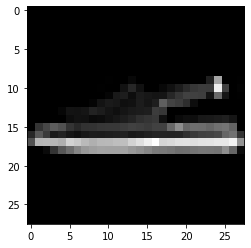

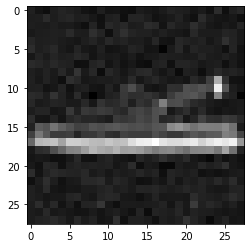

In [14]:
# Shuffle the dataset
np.random.shuffle(img_database)

X_train = img_database

# Normalize the dataset
X_train = X_train

# Create a noisy dataset
X_train_noisy = X_train + 10 * np.random.normal(0, 1, size = X_train.shape)

# Original image
plt.imshow(X_train[0].reshape(28, 28), cmap = 'gray')
plt.show()

# Noisy image
plt.imshow(X_train_noisy[0].reshape(28,28), cmap = 'gray')
plt.show()

Define the metrics

In [16]:
# The loss function
computed_loss = tf.reduce_mean(tf.square(NN_output-Y))

# Define the optimizer
optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(computed_loss)

# Initialize the variables
init = tf.global_variables_initializer()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Run the session

In [19]:
sess = tf.Session()
sess.run(init)
for epoch in range(epochs):
  for i in range(int(total_num_images/batch_size)):
    X_epoch = X_train[i * batch_size : (i+1) * batch_size]
    X_noise_epoch = X_train_noisy[i * batch_size : (i+1) * batch_size]
    _, loss = sess.run([optimizer, computed_loss], feed_dict = {X: X_noise_epoch, Y: X_epoch})
  print('Epoch', epoch, '/', epochs, 'loss', loss)

# Pick any image
X_actual = X_train[:10]
noisy_image = X_train_noisy[:10]

# Run it through the autoencoder
denoised_image = sess.run(NN_output, feed_dict={X:noisy_image})

Epoch 0 / 100 loss 4401.1846
Epoch 1 / 100 loss 4124.2275
Epoch 2 / 100 loss 3731.4285
Epoch 3 / 100 loss 3567.8054
Epoch 4 / 100 loss 3650.1624
Epoch 5 / 100 loss 3428.387
Epoch 6 / 100 loss 3446.4143
Epoch 7 / 100 loss 3382.4712
Epoch 8 / 100 loss 3287.777
Epoch 9 / 100 loss 3261.5527
Epoch 10 / 100 loss 3177.7866
Epoch 11 / 100 loss 3207.6016
Epoch 12 / 100 loss 3153.7244
Epoch 13 / 100 loss 3096.594
Epoch 14 / 100 loss 3098.4202
Epoch 15 / 100 loss 3034.2036
Epoch 16 / 100 loss 3003.378
Epoch 17 / 100 loss 3030.1775
Epoch 18 / 100 loss 3003.5327
Epoch 19 / 100 loss 3034.0989
Epoch 20 / 100 loss 2937.1604
Epoch 21 / 100 loss 3001.8264
Epoch 22 / 100 loss 3002.4136
Epoch 23 / 100 loss 3061.7817
Epoch 24 / 100 loss 2943.4119
Epoch 25 / 100 loss 2987.926
Epoch 26 / 100 loss 2921.0017
Epoch 27 / 100 loss 2864.7976
Epoch 28 / 100 loss 2838.705
Epoch 29 / 100 loss 2833.2617
Epoch 30 / 100 loss 2900.0586
Epoch 31 / 100 loss 2862.1873
Epoch 32 / 100 loss 2786.2566
Epoch 33 / 100 loss 2835.9

Second way to initializing the session

Epoch 0 / 100 loss: nan
Epoch 1 / 100 loss: nan
Epoch 2 / 100 loss: nan
Epoch 3 / 100 loss: nan
Epoch 4 / 100 loss: nan
Epoch 5 / 100 loss: nan
Epoch 6 / 100 loss: nan
Epoch 7 / 100 loss: nan
Epoch 8 / 100 loss: nan
Epoch 9 / 100 loss: nan
Epoch 10 / 100 loss: nan
Epoch 11 / 100 loss: nan
Epoch 12 / 100 loss: nan
Epoch 13 / 100 loss: nan
Epoch 14 / 100 loss: nan
Epoch 15 / 100 loss: nan
Epoch 16 / 100 loss: nan
Epoch 17 / 100 loss: nan
Epoch 18 / 100 loss: nan
Epoch 19 / 100 loss: nan
Epoch 20 / 100 loss: nan
Epoch 21 / 100 loss: nan
Epoch 22 / 100 loss: nan
Epoch 23 / 100 loss: nan
Epoch 24 / 100 loss: nan
Epoch 25 / 100 loss: nan
Epoch 26 / 100 loss: nan
Epoch 27 / 100 loss: nan
Epoch 28 / 100 loss: nan
Epoch 29 / 100 loss: nan
Epoch 30 / 100 loss: nan
Epoch 31 / 100 loss: nan
Epoch 32 / 100 loss: nan
Epoch 33 / 100 loss: nan
Epoch 34 / 100 loss: nan
Epoch 35 / 100 loss: nan
Epoch 36 / 100 loss: nan
Epoch 37 / 100 loss: nan
Epoch 38 / 100 loss: nan
Epoch 39 / 100 loss: nan
Epoch 40 /

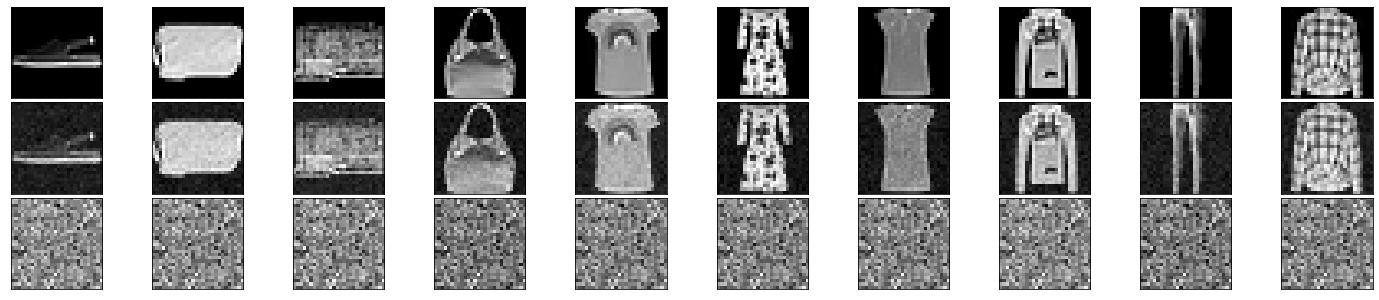

In [20]:
# Another way of running session

X_aztual = X_train[:10]
noisy_image = X_train_noisy[:10]
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for i in range(int(total_num_images/batch_size)):
      X_epoch = X_train[i * batch_size : (i*1) * batch_size]
      X_noise_epoch = X_train_noisy[i * batch_size : (i*1)*batch_size]
      _, loss = sess.run([optimizer, computed_loss], feed_dict = {X: X_noise_epoch, Y: X_epoch})
    print('Epoch', epoch, '/', epochs, 'loss:', loss)
  denoised_image = sess.run(NN_output, feed_dict = {X: noisy_image})

# Pick any image

# Print the original image
fig, axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_actual, noisy_image, denoised_image], axes):
  for img, ax in zip(images, row):
    ax.imshow(img.reshape((28,28)), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)